## Assignment 03 - Obeject Counting on a Conveyor Belt 
Name - **D.M.S.S.Dissanayake**   
Index No - **190155L**

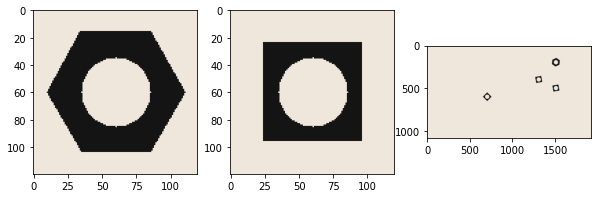

In [123]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3,figsize=(10,10))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

hexnut_template -> threshold value =  20.0
squarenut_template -> threshold value =  20.0
conveyer_f100 -> threshold value =  20.0


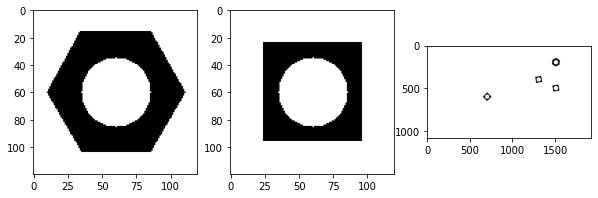

In [124]:
# Convert images to grayscale
hexnut_template = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
squarenut_template = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
conveyor_f100 = cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)

# Otsu's thresholding
ret1, hexnut_im = cv.threshold(hexnut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2, squarenut_im = cv.threshold(squarenut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3, converyer_im = cv.threshold(conveyor_f100,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

print("hexnut_template -> threshold value = ",ret1)
print("squarenut_template -> threshold value = ",ret2)
print("conveyer_f100 -> threshold value = ",ret3)

fig, ax = plt. subplots(1,3, figsize=(10,10))
ax[0].imshow(cv.cvtColor(hexnut_im, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_im, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(converyer_im, cv.COLOR_RGB2BGR))


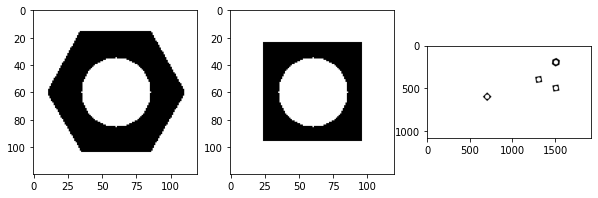

In [127]:
# Apply morphological closing on the images
kernel = np.ones((3,3),np.uint8)
closing1 = cv.morphologyEx(hexnut_im, cv.MORPH_CLOSE, kernel).astype(np.uint8)
closing2 = cv.morphologyEx(squarenut_im, cv.MORPH_CLOSE, kernel).astype(np.uint8)
closing3 = cv.morphologyEx(converyer_im, cv.MORPH_CLOSE, kernel).astype(np.uint8)

fig, ax = plt. subplots(1,3, figsize=(10,10))
ax[0].imshow(cv.cvtColor(closing1, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(closing2, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(closing3, cv.COLOR_RGB2BGR))


3
(3, 5)
[[  11   16   99   88 4722]
 [   0    0  120  120 7717]
 [  35   35   51   51 1961]]
[[59.83354511 59.22257518]
 [59.168848   59.54269794]
 [60.         60.        ]]


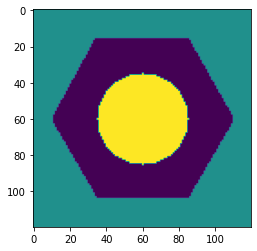

In [209]:
connectivity = 4  # You need to choose 4 or 8 for connectivity type
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(closing1 , connectivity , cv.CV_32S)
labels = labels.astype(np.uint8)

print(num_labels)
print(stats.shape)
print(stats)
print(centroids)


plt.rcParams["figure.figsize"] = (4,4)
plt.imshow(labels)

3
[[  24   24   72   72 3223]
 [   0    0  120  120 9216]
 [  35   35   51   51 1961]]
[[59.19578033 59.19578033]
 [59.5        59.5       ]
 [60.         60.        ]]


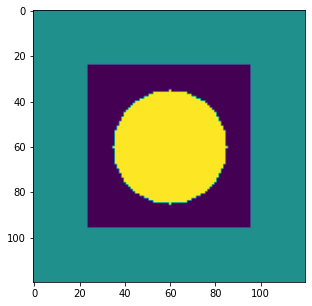

In [208]:
connectivity = 4  # You need to choose 4 or 8 for connectivity type
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(closing2 , connectivity , cv.CV_32S)
labels = labels.astype(np.uint8)

print(num_labels)
print(stats)
print(centroids)

plt.imshow(labels)

6
(6, 5)
[[    651     151     895     499   13930]
 [      0       0    1920    1080 2051826]
 [   1475     175      51      51    1961]
 [   1275     375      51      51    1961]
 [   1475     475      51      51    1961]
 [    675     575      51      51    1961]]
[[1275.02110553  400.11083991]
 [ 956.24734066  540.88404962]
 [1500.          200.        ]
 [1300.          400.        ]
 [1500.          500.        ]
 [ 700.          600.        ]]


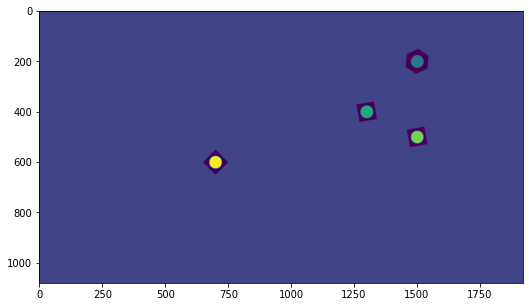

In [213]:
connectivity = 4  # You need to choose 4 or 8 for connectivity type
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(closing3 , connectivity , cv.CV_32F)
labels = labels.astype(np.uint8)

print(num_labels)
print(stats.shape)
print(stats)
print(centroids)

plt.rcParams["figure.figsize"] = (10,5)
plt.imshow(labels)

(array([[[  0,   0]],

       [[  0, 119]],

       [[119, 119]],

       [[119,   0]]], dtype=int32), array([[[ 34,  15]],

       [[ 85,  15]],

       [[ 87,  17]],

       [[ 87,  18]],

       [[ 88,  19]],

       [[ 88,  20]],

       [[ 89,  21]],

       [[ 89,  22]],

       [[ 91,  24]],

       [[ 91,  25]],

       [[ 92,  26]],

       [[ 92,  27]],

       [[ 93,  28]],

       [[ 93,  29]],

       [[ 95,  31]],

       [[ 95,  32]],

       [[ 96,  33]],

       [[ 96,  34]],

       [[ 97,  35]],

       [[ 97,  36]],

       [[ 98,  37]],

       [[ 98,  38]],

       [[100,  40]],

       [[100,  41]],

       [[101,  42]],

       [[101,  43]],

       [[102,  44]],

       [[102,  45]],

       [[104,  47]],

       [[104,  48]],

       [[105,  49]],

       [[105,  50]],

       [[106,  51]],

       [[106,  52]],

       [[108,  54]],

       [[108,  55]],

       [[109,  56]],

       [[109,  57]],

       [[110,  58]],

       [[110,  62]],

       [[109,  63

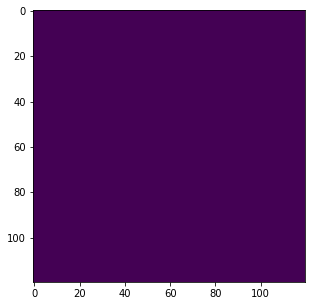

In [243]:
contours, hierarchy = cv.findContours(closing1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print(contours)
im = np.zeros((closing1.shape[0],closing1.shape[1]))
cv.drawContours(im, contours, -1, (0,255,0), 3)
plt.imshow(im)
